### 问题设定：
单变量线性回归的一般形式： \
$y_i=\beta_0 + \beta_1x_i+\epsilon_i$\
其中 $\beta_1=\frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2} = \frac{Cov(x,y)}{Var(x)}$\
$\beta_0=\bar{y}-\beta_1\bar{x}$


In [15]:
from __future__ import division

#input: list
def mean(x):
    return sum(x) / float(len(x))

'''input a list x, return variance, no constant term'''
def variance(x):
    n = len(x)
    mean_x = mean(x)
    
    return sum([(x_i-mean_x)**2 for x_i in x])

'''covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))
return cov without constant term'''
def covariance(x, y):
    cov = 0.0
    mean_x, mean_y = mean(x), mean(y)
    for i in range(len(x)):
        cov += (x[i] - mean_x) * (y[i] - mean_y)
    return cov

'''return beta_0 and beta_1 of a simple regression model
with given x and y'''
def least_square_fit(x, y):
    beta_1 = covariance(x, y) / variance(x)
    beta_0 = mean(y) - beta_1*mean(x)
    return [beta_0, beta_1]

'''return single predict value y_i with given beta0 beta1'''
def predict_i(beta_0, beta_1, x_i):
    return beta_1 * x_i + beta_0

#return a list of all prediction value[y1,y2...yn]
# with given x_test list
def predict(beta_0, beta_1, x_test):
    predictions = list()
    for x_i in x_test:
        yhat = beta_0 + beta_1 * x_i
        predictions.append(yhat)
    return predictions

#reaturn error between true and prediction
def error(beta_0, beta_1, x_i, y_i):
    return y_i - predict_i(beta_0, beta_1, x_i)

#接下计算R^2 会调用
def sum_of_squared_errors(beta_0, beta_1, x, y):
    return sum(error(beta_0, beta_1, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

def total_sum_of_squares(y):
    y_mean = mean(y)
    de_mean = [y_i - y_mean for y_i in y]
    return sum(v ** 2 for v in de_mean)

#计算回归模型的R^2
def r_squared(beta_0, beta_1, x, y):
    return 1.0 - (sum_of_squared_errors(beta_0, beta_1, x, y) /
                  total_sum_of_squares(y))

#计算mean square error
def mse(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return mean_error

In [ ]:
#gd 解法, 输入数据x, y
# 返回 模型参数
def gradient_descent(x, y):
    theta_0, theta_1 = 0, 0
    rate = 0.001
    epochs = 1000 #循环的次数
    n = float(len(x))
    
    for i in range(epochs):
        y_pred = [theta_1*x_i + theta_0 for x_i in x]
        delta_y = [y_i - y_hat for y_i, y_hat in zip(y, y_pred)]
        partical_theta1 = (-2/n)* sum([x_i * delta_y_i for x_i, delta_y_i in zip(x, delta_y)])
        partical_theta0 = (-2/n)* sum(delta_y)  #partical derivative wrt to constant theta0

        #update function
        theta_1 = theta_1 - rate * partical_theta1
        theta_0 = theta_0 - rate * partical_theta0
    
    return (theta_0, theta_1)


In [95]:
#生成数据
import numpy as np
import matplotlib.pyplot as plt
from random import sample

np.random.seed(1010)
x = range(1, 50) #sample(range(1, 100), 50)
y = [3 + 0.5*x_i + np.random.normal(0,5,1) for x_i in x]

model para:  [1.41466204] [0.50299914]
r2 of model  [0.66382434]
mes of the model  [11.00909257]


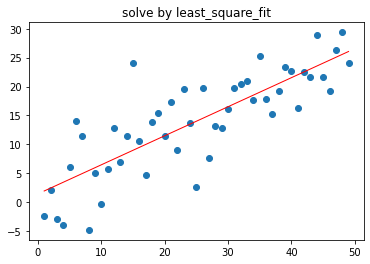

In [96]:
t0, t1 = least_square_fit(x, y)
y_pred = predict(t0, t1, x)
model_mse = mse(y[35:], y_pred[35:])
r2 = r_squared(t0, t1, x, y)
print('model para: ', t0, t1)
print('r2 of model ', r2)
print('mes of the model ', model_mse)


plt.scatter(x, y)
plt.plot(x, y_pred, color="red", linewidth=1)
plt.title("solve by least_square_fit")
plt.show()

model para:  [0.55342446] [0.52910491]
r2 of model  [0.66146543]
mes of the model  [11.33011041]


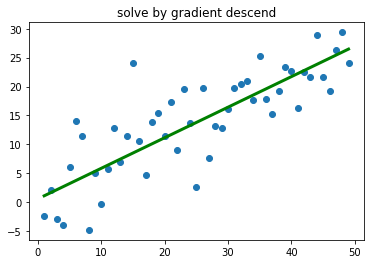

In [97]:
t0, t1 = gradient_descent(x, y)
y_pred = predict(t0, t1, x)
model_mse = mse(y[35:], y_pred[35:])
r2 = r_squared(t0, t1, x, y)
print('model para: ', t0, t1)
print('r2 of model ', r2)
print('mes of the model ', model_mse)


plt.scatter(x, y)
plt.plot(x, y_pred, color="green", linewidth=3)
plt.title("solve by gradient descend")
plt.show()

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


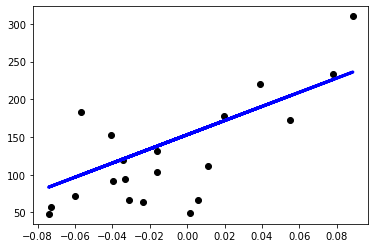

In [83]:
#例子

# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.show()